In [1]:
import healpy as hp
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
import pandas as pd


In [2]:
NSIDE = 2**10
NPIX = hp.nside2npix(NSIDE)

In [3]:
Ra, Dec = hp.pix2ang(NSIDE, np.arange(NPIX), lonlat=True)


In [4]:
icrscoordiantes = SkyCoord(
        ra=Ra * u.deg,
        dec=Dec * u.deg,
        frame="icrs",
    )
galactic = icrscoordiantes.galactic
galactic_b_5 = np.where(np.abs(galactic.b.degree)<5)

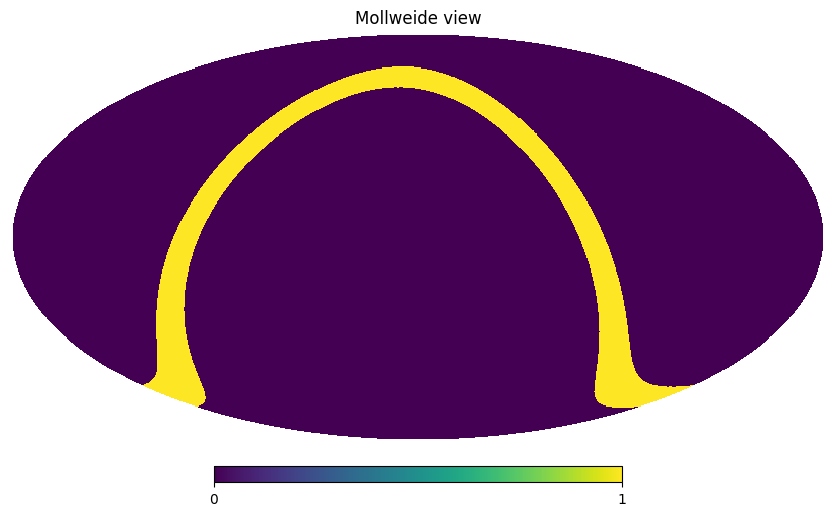

In [5]:
mask_map = np.zeros(NPIX)
mask_map[galactic_b_5] = 1
hp.mollview(mask_map)

In [6]:
TeVdata = pd.read_table("/home2/hky/github/Gamma_Energy/AllSky_withCR/TeVcat.log")
Ra_TeVcat = TeVdata["Ra"].to_numpy()
Dec_TeVcat = TeVdata["Dec"].to_numpy()
for i in range(len(Ra_TeVcat)):
    Ra_TeVcat_tmp = Ra_TeVcat[i].split()
    Dec_TeVcat_tmp = Dec_TeVcat[i].split()
    Ra_TeVcat[i] = (
        float(Ra_TeVcat_tmp[0]) / 24
        + float(Ra_TeVcat_tmp[1]) / 24 / 60
        + float(Ra_TeVcat_tmp[2]) / 24 / 60 / 60
    ) * 360
    Dec_TeVcat[i] = float(Dec_TeVcat_tmp[0])
    delta_Dec_TeVcat = (
        float(Dec_TeVcat_tmp[1]) / 60 + float(Dec_TeVcat_tmp[2]) / 60 / 60
    )
    Dec_TeVcat[i] += (-1) ** (Dec_TeVcat[i] < 0) * delta_Dec_TeVcat

Ra_TeVcat = Ra_TeVcat.astype(np.float32)
Dec_TeVcat = Dec_TeVcat.astype(np.float32)
TeVname = TeVdata["Name"]
TeVtype = TeVdata["Type"]


In [7]:
for Ra_tmp,Dec_tmp in zip(Ra_TeVcat,Dec_TeVcat):
    mask_map[hp.query_disc(NSIDE,hp.ang2vec(Ra_tmp,Dec_tmp,lonlat=True),np.radians(1))]=1

In [8]:
mask_map[hp.query_disc(NSIDE,hp.ang2vec(98.5,17.8,lonlat=True),np.radians(3))]=1


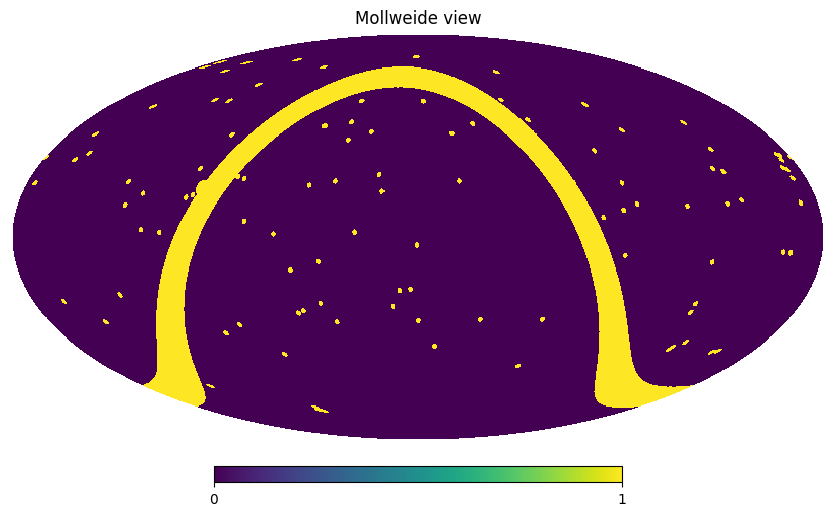

In [9]:
hp.mollview(mask_map)


In [10]:
np.save("/home2/hky/github/Gamma_Energy/find_source/data/knowsource.npy",mask_map)